# FACE MASK DETECTOR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir=r'E:\PROJECT\Final_Assignment_Face Mask Dataset\Train'
validation_dir=r'E:\PROJECT\Final_Assignment_Face Mask Dataset\Validation'
test_dir=r'E:\PROJECT\Final_Assignment_Face Mask Dataset\Test'

# DATA AUGMENTATION

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255,
                            rotation_range=50,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                             shear_range=0.2,
                            horizontal_flip=True)

test_gen=ImageDataGenerator(rescale=1./255)

In [5]:
train_generator=train_gen.flow_from_directory(train_dir,
                                             target_size=(64,64),
                                             batch_size=100,
                                             class_mode='binary')
validation_generator=test_gen.flow_from_directory(validation_dir,
                                                 target_size=(64,64),
                                                 batch_size=16,
                                                 class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications import VGG16

# MODEL ARCHITECTURE

In [7]:
conv_lay=VGG16(weights='imagenet',
              include_top=False,
              input_shape=(64,64,3))

In [8]:
conv_lay.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [9]:
model=models.Sequential()
model.add(conv_lay)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [11]:
es=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
cb=keras.callbacks.ModelCheckpoint("Model_mask.keras",save_best_model=True)

# MODEL TRAINING

In [12]:
his=model.fit(train_generator,
         steps_per_epoch=100,
         epochs=30,
         validation_data=validation_generator,
         validation_steps=50,
         callbacks=[es,cb])

Epoch 1/30
100/100 [==============================] - 491s 5s/step - loss: 0.4687 - acc: 0.7563 - val_loss: 0.0301 - val_acc: 0.9875
Epoch 2/30
100/100 [==============================] - 485s 5s/step - loss: 0.1019 - acc: 0.9609 - val_loss: 0.0229 - val_acc: 0.9925
Epoch 3/30
100/100 [==============================] - 484s 5s/step - loss: 0.0736 - acc: 0.9738 - val_loss: 0.0143 - val_acc: 0.9975
Epoch 4/30
100/100 [==============================] - 484s 5s/step - loss: 0.0412 - acc: 0.9859 - val_loss: 0.0105 - val_acc: 0.9975
Epoch 5/30
100/100 [==============================] - 485s 5s/step - loss: 0.0436 - acc: 0.9839 - val_loss: 0.0187 - val_acc: 0.9937
Epoch 6/30
100/100 [==============================] - 487s 5s/step - loss: 0.0261 - acc: 0.9909 - val_loss: 0.0100 - val_acc: 0.9962
Epoch 7/30
100/100 [==============================] - 483s 5s/step - loss: 0.0181 - acc: 0.9938 - val_loss: 0.0068 - val_acc: 0.9975
Epoch 8/30
100/100 [==============================] - 490s 5s/step - 

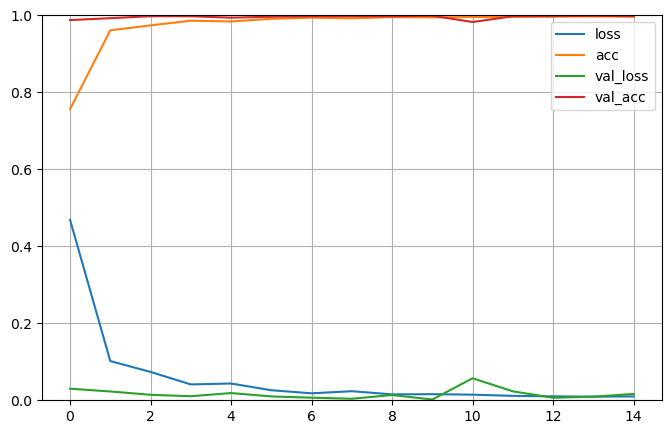

In [13]:
pd.DataFrame(his.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# MODEL TESTING

In [14]:
test_generator=test_gen.flow_from_directory(test_dir,
                                           target_size=(64,64),
                                           batch_size=20,
                                           class_mode='binary')

Found 992 images belonging to 2 classes.


In [15]:
model.evaluate(test_generator,steps=50)

50/50 [==============================] - 8s 155ms/step - loss: 0.0061 - acc: 0.9970


[0.006108259316533804, 0.9969757795333862]